Prever a espécie da flor com base nas medições das pétalas

Dataset: https://www.kaggle.com/datasets/vikrishnan/iris-dataset







The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In [ ]:
# importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# importar os dados
iris = pd.read_csv('iris.csv')

# primeiras linhas dos dados
print(iris.head())

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Pré-processamento de dados para aprendizado de máquina:

In [ ]:
# converter 'class' em categorias
iris['class'] = iris['class'].astype('category')

# separar features (variáveis independentes e representam info pras previsões ou classificações) e target (variável dependente e é o que estamos tentando prever ou classificar)
X = iris.drop('class', axis=1)
y = iris['class']

# dividir os dados em conj. de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler transforma feature p melhorar a performance do algoritmo, como colocar std = 1 e calcular a média
# o 'fit' calcula mean e std das features (X_train por ex.) e o 'transform' aplica a transformação padronizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# treinar o modelo
knn3 = KNeighborsClassifier(n_neighbors=3)  # k = 3
knn3.fit(X_train, y_train)

# previsão
y_pred3 = knn3.predict(X_test)

# assertividade
accuracy = accuracy_score(y_test, y_pred3)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred3))

Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



um ótimo desempenho, mas vamos verificar um pouco mais com um k diferente e fazendo validação cruzada

In [ ]:
# Treinar kNN com n_neighbors=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

# Fazer previsões
y_pred5 = knn5.predict(X_test)

# Avaliar a assertividade
accuracy5 = accuracy_score(y_test, y_pred5)
print(f'Accuracy com n_neighbors=5: {accuracy5:.2f}')
print(classification_report(y_test, y_pred5))

Accuracy com n_neighbors=5: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



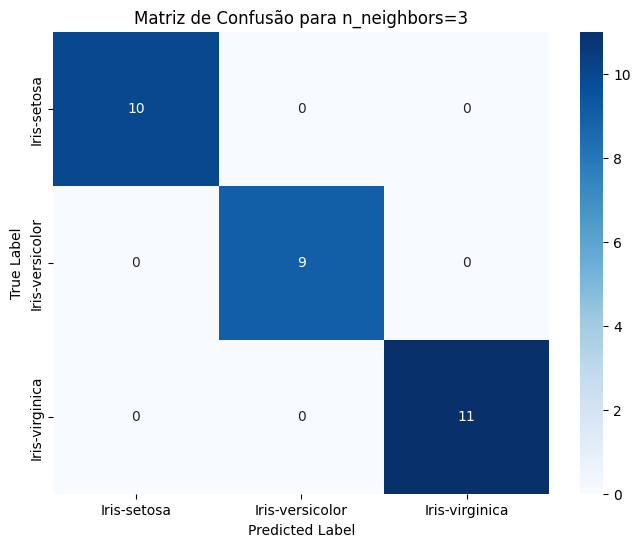

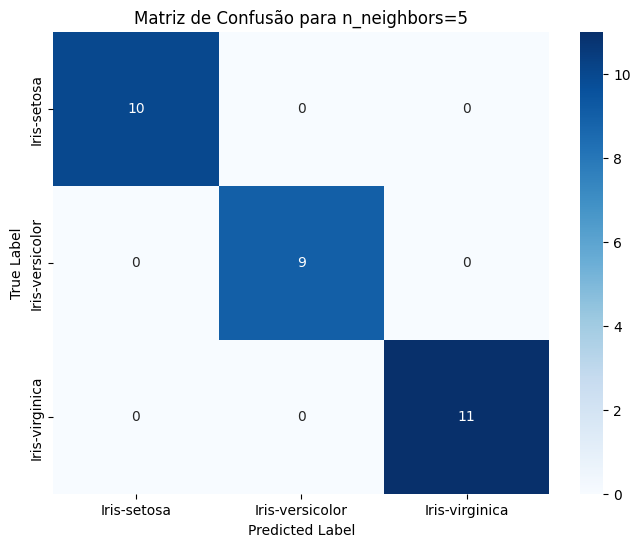

In [ ]:
# plotar a matriz de confusão para n_neighbors=3
cm3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=iris['class'].cat.categories, yticklabels=iris['class'].cat.categories)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Matriz de Confusão para n_neighbors=3')
plt.show()

# plotar a matriz de confusão para n_neighbors=5
cm5 = confusion_matrix(y_test, y_pred5)
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', xticklabels=iris['class'].cat.categories, yticklabels=iris['class'].cat.categories)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Matriz de Confusão para n_neighbors=5')
plt.show()


In [ ]:
validacao_x = cross_val_score(knn5, X, y, cv=5, scoring='accuracy')
print(np.mean(validacao_x), np.std(validacao_x))

0.9733333333333334 0.02494438257849294


O modelo kNN tem acurácia de 98% com 1,63%, ou seja, o modelo tem consistência nas previsões, com grande capacidade de classificar as flores e estabilidade nessa validação cruzada (sem overfitting)

In [ ]:
# treinar o modelo - k = 10
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)

# previsão
y_pred10 = knn10.predict(X_test)

# assertividade
accuracy = accuracy_score(y_test, y_pred10)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred10))

Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



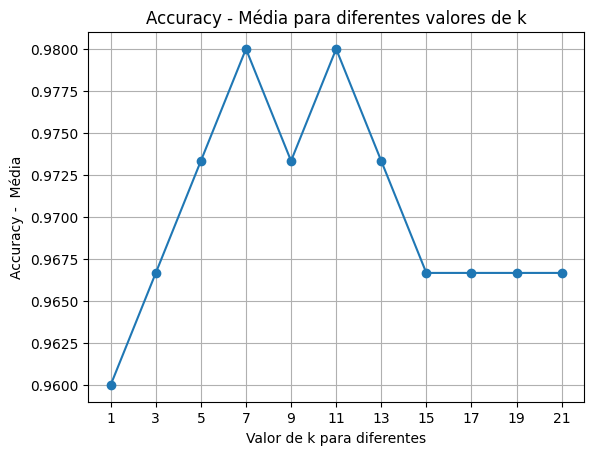

In [ ]:
# testar diferentes valores de k
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    validacao_x = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    accuracy_scores.append(np.mean(validacao_x))

# plotar
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Valor de k para diferentes')
plt.ylabel('Accuracy -  Média')
plt.title('Accuracy - Média para diferentes valores de k')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
k_values_7_11 = [7, 11]
resultado = {}

# loop pra calcular a accuracy para kd valor de k
for k in k_values_7_11:
    knn = KNeighborsClassifier(n_neighbors=k)
    validacao_x = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    resultado[k] = {
        'mean_accuracy': np.mean(validacao_x),
        'std_accuracy': np.std(validacao_x)
    }
for k in k_values_7_11:
    print(f'k = {k}:')
    print(f'Média - Accuracy: {resultado[k]["mean_accuracy"]:.4f}')
    print(f'Desvio padrão - Accuracy: {resultado[k]["std_accuracy"]:.4f}')

k = 7:
Média - Accuracy: 0.9800
Desvio padrão - Accuracy: 0.0163
k = 11:
Média - Accuracy: 0.9800
Desvio padrão - Accuracy: 0.0267


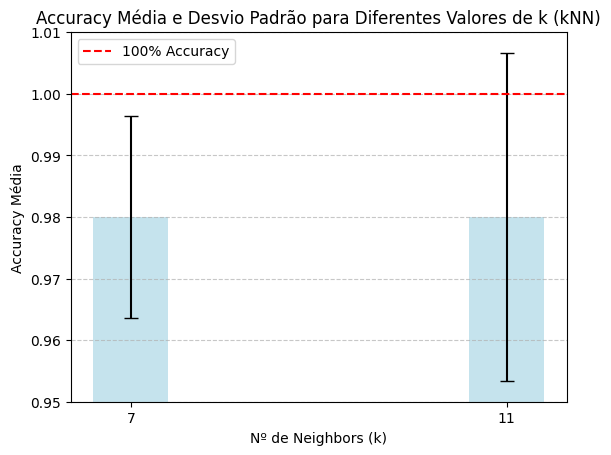

In [ ]:
# media e std
mean_accuracies = [resultado[k]['mean_accuracy'] for k in k_values_7_11]
std_accuracies = [resultado[k]['std_accuracy'] for k in k_values_7_11]

# gráfico de barras
plt.bar(k_values_7_11, mean_accuracies, yerr=std_accuracies, capsize=5, color='lightblue', alpha=0.7)
# add título e rótulo
plt.title('Accuracy Média e Desvio Padrão para Diferentes Valores de k (kNN)')
plt.xlabel('Nº de Neighbors (k)')
plt.ylabel('Accuracy Média')
plt.xticks(k_values_7_11)
# add uma linha horizontal para 100% do Accuracy
plt.axhline(y=1.0, color='r', linestyle='--', label='100% Accuracy')
plt.legend()

# gráfico
plt.ylim(0.95, 1.01)  # ajustando os limites do eixo y p/ melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Barra azul: média

Linha preta: STD

Linha tracejada vermelha: accuracy

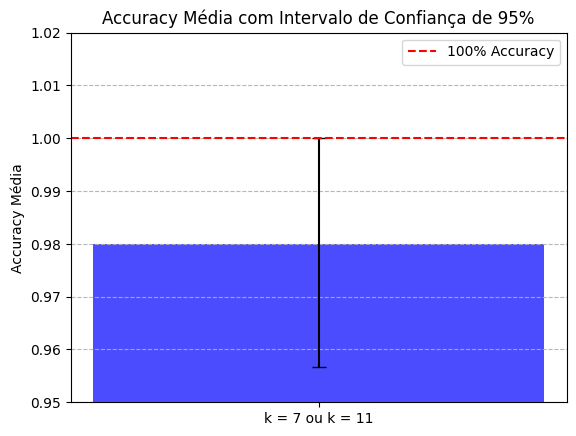

In [ ]:
# dados
mean_accuracy = 0.9800
std_accuracy = 0.0267
n = 5
z_score = 1.96

# calcular erro padrão
standard_error = std_accuracy / (n ** 0.5)

# limites do intervalo de confiança
lower_bound = mean_accuracy - (z_score * standard_error)
upper_bound = mean_accuracy + (z_score * standard_error)

# limite nao ultrapasse 1
upper_bound = min(upper_bound, 1.0)


# dados para o gráfico
k_values = [1]  # Usando apenas um valor de k
mean_values = [mean_accuracy]

# calcular os erros
error_lower = mean_accuracy - lower_bound
error_upper = upper_bound - mean_accuracy
# gráfico de barras
plt.bar(k_values, mean_values,
        yerr=[[error_lower], [error_upper]],  # passando erro inferior e superior corretamente
        capsize=5, color='blue', alpha=0.7)

# adicionar título e rótulos
plt.title('Accuracy Média com Intervalo de Confiança de 95%')
plt.ylabel('Accuracy Média')
plt.xticks(k_values, ['k = 7 ou k = 11'])

# linha horizontal para 100% de acurácia
plt.axhline(y=1.0, color='red', linestyle='--', label='100% Accuracy')
plt.legend()

# gráfico
plt.ylim(0.95, 1.02)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

### **Insight**

Com a média apresentada e STDs '0.0163' e '0.0267', os dois (k = 7 e k = 11 respectivamente) têm um ótimo desempenho, mas o k = 7 ainda pode ser melhor que o k = 11.


# Importando bibliotecas da árvore de decissão


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree

# Treinando e Prevendo

In [ ]:
# Treinar Decision Tree com n_neighbors=3
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Fazer previsões
y_pred3 = dt.predict(X_test)

# Avaliar a assertividade
accuracy3 = accuracy_score(y_test, y_pred3)
print(f'Accuracy com n_neighbors=3: {accuracy3:.2f}')

Accuracy com n_neighbors=3: 1.00


# Verificando a estrutura da árvore de decissão


In [ ]:
tree_rules = export_text(dt, feature_names=list(X.columns))
print(tree_rules)

|--- petal length <= -0.73
|   |--- class: Iris-setosa
|--- petal length >  -0.73
|   |--- petal length <= 0.59
|   |   |--- petal width <= 0.62
|   |   |   |--- class: Iris-versicolor
|   |   |--- petal width >  0.62
|   |   |   |--- class: Iris-virginica
|   |--- petal length >  0.59
|   |   |--- petal width <= 0.76
|   |   |   |--- petal length <= 0.70
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- petal length >  0.70
|   |   |   |   |--- petal width <= 0.49
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- petal width >  0.49
|   |   |   |   |   |--- petal length <= 0.99
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- petal length >  0.99
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- petal width >  0.76
|   |   |   |--- petal length <= 0.64
|   |   |   |   |--- sepal width <= 0.10
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- sepal width >  0.10
|   |   |   |   |   |--- class: Iris

# Dados visual

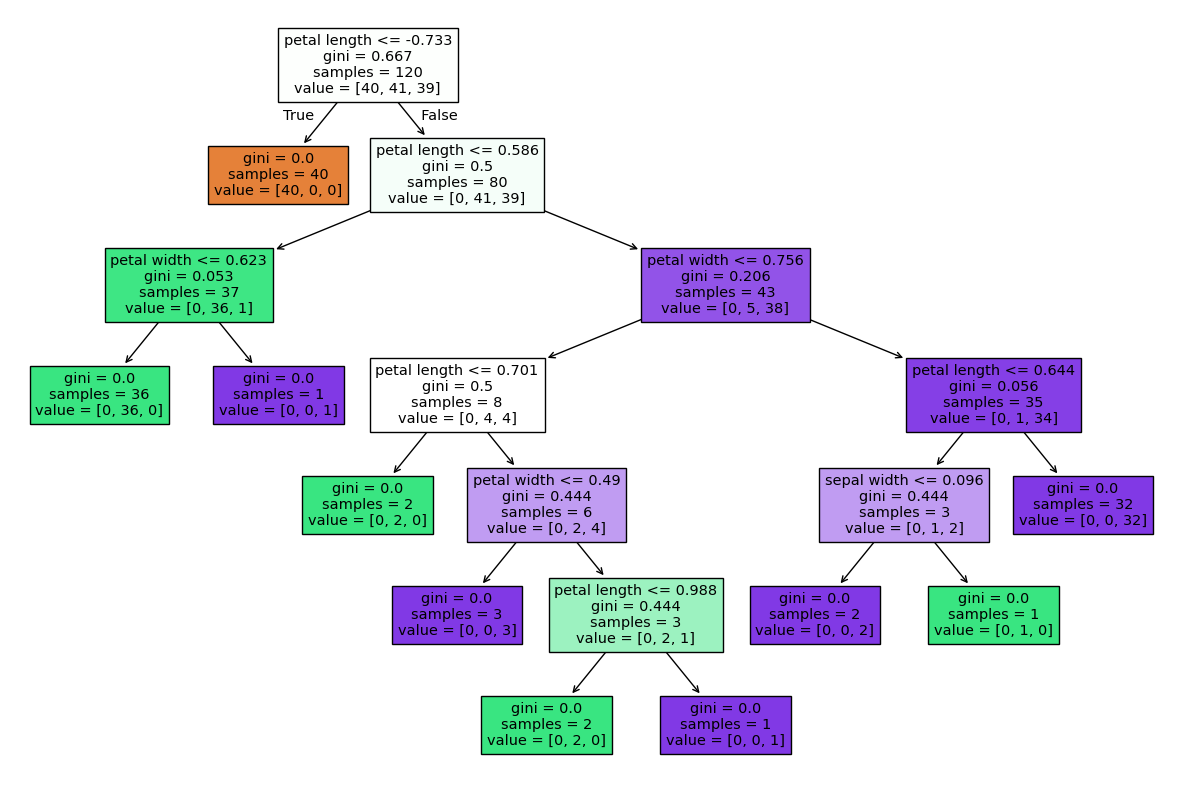

In [ ]:
#Visual
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=list(X.columns), filled=True)
plt.show()

# Importando bibliotecas das redes neurais

In [ ]:
import torch
from torch import nn
from sklearn.preprocessing import LabelEncoder
from torch.functional import F

In [ ]:
class IrisNet(nn.Module):
  def __init__(self):
    super(IrisNet, self).__init__()
    # Definindo as camadas (layers)
    # Primeira camada completamente conectada (fully connected) com 4 entradas (características do dataset Iris)
    # e 10 neurônios na camada oculta
    self.fc1 = nn.Linear(4, 10)

    # Função de ativação Sigmoid para introduzir não-linearidade após a primeira camada
    self.activation1 = nn.Sigmoid()

    # Inicializando os pesos da primeira camada com uma distribuição normal
    # Média de 0.0 e desvio padrão de 1.0 para maior variabilidade inicial nos pesos
    nn.init.normal_(self.fc1.weight, mean=0.0, std=1.0, generator=None)

    # Dropout aplicado após a primeira camada para evitar overfitting (taxa de 20%)
    self.dropout1 = nn.Dropout(0.2)

    # Segunda camada completamente conectada (fully connected) com 10 entradas (neurônios da camada anterior)
    # e 8 neurônios nesta camada oculta
    self.fc2 = nn.Linear(10, 8)

    # Função de ativação Sigmoid aplicada à segunda camada
    self.activation2 = nn.Sigmoid()

    # Inicializando os pesos da segunda camada com a mesma distribuição normal (média 0.0, desvio padrão 1.0)
    nn.init.normal_(self.fc2.weight, mean=0.0, std=1.0, generator=None)

    # Dropout aplicado após a segunda camada para evitar overfitting (também com taxa de 20%)
    self.dropout2 = nn.Dropout(0.2)

    # Camada de saída completamente conectada (fully connected) com 8 entradas
    # e 3 saídas (correspondente às 3 classes do dataset Iris)
    self.fc3 = nn.Linear(8, 3)

  def forward(self, x):
    # Definindo o fluxo de dados (forward pass)

    # Passa os dados pela primeira camada, ativação e dropout
    x = self.fc1(x)
    x = self.activation1(x)
    x = self.dropout1(x)

    # Passa pela segunda camada, ativação e dropout
    x = self.fc2(x)
    x = self.activation2(x)
    x = self.dropout2(x)

    # Passa pela camada de saída
    x = self.fc3(x)

    # Retorna a saída da rede (valores não normalizados, conhecidos como logits)
    return x


In [ ]:
# O LabelEncoder é utilizado para converter os rótulos de classe em valores numéricos.
# Isso é necessário porque muitos modelos de machine learning esperam que os rótulos estejam em formato numérico.
# A função 'fit_transform' ajusta o encoder ao conjunto de dados 'y_train' e, em seguida,
# transforma as classes categóricas (strings) em números inteiros.

transform = LabelEncoder()
y_train = transform.fit_transform(y_train)

In [ ]:
# Converte o array 'X_train' para um tensor PyTorch.
# A função 'np.array' garante que 'X_train' seja convertido para um array NumPy do tipo float32,
# que é um formato comum para redes neurais (precisão de ponto flutuante de 32 bits).
# 'torch.tensor' converte esse array NumPy para um tensor PyTorch, que é necessário para realizar operações
# de aprendizado de máquina com PyTorch.

X = torch.tensor(np.array(X_train, dtype=np.float32))

# Converte o array 'y_train' (rótulos de classe) em um tensor PyTorch.
# O tipo 'torch.long' é usado porque as classes de saída em tarefas de classificação geralmente são inteiros,
# e o PyTorch requer o tipo 'long' (inteiros de 64 bits) para os rótulos de saída em problemas de classificação.
# Esses rótulos serão usados na função de perda, como CrossEntropyLoss, que requer esse tipo específico.

target = torch.tensor(y_train, dtype=torch.long)


In [ ]:
# Cria um TensorDataset combinando os tensores de entrada 'X' e os rótulos 'target'.
# O TensorDataset é uma estrutura de dados do PyTorch que permite empacotar os dados de entrada e seus rótulos correspondentes
# em um único objeto. Isso facilita a iteração durante o treinamento, onde cada amostra de 'X' está associada ao seu rótulo
# correspondente em 'target'.
# Este dataset pode ser posteriormente utilizado com um DataLoader para dividir os dados em mini-batches.

data_tensor = torch.utils.data.TensorDataset(X, target)


In [ ]:
# Cria um DataLoader a partir do dataset 'data_tensor'.
# O DataLoader facilita o processo de treinamento ao dividir os dados em mini-batches (neste caso, de tamanho 10)
# e realizar o shuffle (embaralhamento) a cada época, garantindo que as amostras sejam apresentadas ao modelo
# em uma ordem diferente a cada vez.
# Isso ajuda a reduzir o risco de overfitting e melhora a generalização do modelo.

train_loader = torch.utils.data.DataLoader(data_tensor, batch_size=10, shuffle=True)


In [ ]:
# Instancia o modelo 'IrisNet', que foi previamente definido.
# 'model' é agora um objeto da classe IrisNet, contendo a arquitetura da rede neural especificada,
# que inclui camadas totalmente conectadas, funções de ativação, dropout e a inicialização de pesos.
# Este modelo pode agora ser treinado com dados, realizando previsões e calculando gradientes.

model = IrisNet()


In [ ]:
# Define o otimizador e a função de perda para o treinamento do modelo.
# O otimizador utilizado é o Stochastic Gradient Descent (SGD), que ajusta os pesos do modelo
# durante o treinamento para minimizar a função de perda. O parâmetro 'lr' define a taxa de aprendizado,
# que controla o tamanho dos ajustes feitos aos pesos em cada iteração.
# A função de perda é CrossEntropyLoss, que é adequada para tarefas de classificação multi-classes,
# como o problema do dataset Iris.

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Define a função de perda como a CrossEntropyLoss.
# Esta função calcula a diferença entre as previsões do modelo e os rótulos reais (ground truth).
# Em problemas de classificação multi-classes, a CrossEntropyLoss é ideal porque mede a discrepância
# entre as probabilidades previstas e os rótulos reais, penalizando previsões incorretas mais fortemente.

criterion = nn.CrossEntropyLoss()


In [ ]:
# Loop de treinamento para 2000 épocas. Em cada época, o modelo passa por todo o conjunto de dados de treino.
# O número de épocas (2000) define quantas vezes o modelo verá o conjunto completo de dados durante o treinamento.

for epoch in range(2000):

    # Inicializa as variáveis para acompanhar a perda e a precisão durante a época.
    running_loss = 0.0
    running_accuracy = 0.0

    # Itera sobre os dados em mini-batches fornecidos pelo DataLoader.
    for data in train_loader:
        inputs, labels = data  # 'inputs' são as características e 'labels' são os rótulos das classes.

        # Zera os gradientes acumulados dos parâmetros do modelo antes de realizar uma nova atualização.
        optimizer.zero_grad()

        # Faz uma previsão (forward pass) com os dados de entrada usando o modelo.
        outputs = model(inputs)

        # Calcula a perda comparando as previsões do modelo com os rótulos reais.
        loss = criterion(outputs, labels)

        # Calcula os gradientes da função de perda em relação aos pesos do modelo (backward pass).
        loss.backward()

        # Atualiza os pesos do modelo com base nos gradientes calculados.
        optimizer.step()

        # Acumula a perda total da época.
        running_loss += loss.item()

        # Converte as saídas do modelo em probabilidades usando a função softmax.
        ps = F.softmax(outputs, dim=1)

        # Obtém a classe com a maior probabilidade prevista pelo modelo (top-1).
        top_p, top_class = ps.topk(k=1, dim=1)

        # Compara as previsões com os rótulos reais.
        equals = top_class == labels.view(*top_class.shape)

        # Calcula a precisão do modelo no mini-batch atual e acumula.
        running_accuracy += torch.mean(equals.type(torch.float))

    # Exibe a perda média e a precisão para cada época.
    print('Época {:3d}: perda {:3.5f} - precisão {:3.5f}'.format(epoch + 1, running_loss / len(train_loader), running_accuracy / len(train_loader)))


<ipython-input-111-ad3618f7fe31>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ps = F.softmax(outputs)


Época   1: perda 1.13394 - precisão 0.32500
Época   2: perda 1.13483 - precisão 0.27500
Época   3: perda 1.12514 - precisão 0.30833
Época   4: perda 1.11815 - precisão 0.35833
Época   5: perda 1.10175 - precisão 0.37500
Época   6: perda 1.10234 - precisão 0.38333
Época   7: perda 1.08096 - precisão 0.43333
Época   8: perda 1.11897 - precisão 0.31667
Época   9: perda 1.09437 - precisão 0.35000
Época  10: perda 1.08714 - precisão 0.41667
Época  11: perda 1.07685 - precisão 0.42500
Época  12: perda 1.08307 - precisão 0.38333
Época  13: perda 1.05872 - precisão 0.46667
Época  14: perda 1.05776 - precisão 0.45833
Época  15: perda 1.08404 - precisão 0.38333
Época  16: perda 1.07720 - precisão 0.42500
Época  17: perda 1.05971 - precisão 0.50000
Época  18: perda 1.04689 - precisão 0.48333
Época  19: perda 1.05155 - precisão 0.44167
Época  20: perda 1.04692 - precisão 0.49167
Época  21: perda 1.04355 - precisão 0.45000
Época  22: perda 1.00625 - precisão 0.55833
Época  23: perda 1.04153 - preci

In [ ]:
# Coloca o modelo em modo de avaliação.
# Isso é importante porque durante a avaliação (ou inferência), alguns comportamentos do modelo mudam:
# - Dropout é desativado, ou seja, as unidades da rede são todas utilizadas em vez de serem desligadas aleatoriamente.
# - Camadas como BatchNorm, se existirem, usam as estatísticas acumuladas durante o treinamento em vez de atualizar essas estatísticas.
# Esse modo garante que o modelo se comporte corretamente durante a validação ou teste, sem introduzir ruído ou mudanças temporárias nos parâmetros.

model.eval()

IrisNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (activation1): Sigmoid()
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=10, out_features=8, bias=True)
  (activation2): Sigmoid()
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)

In [ ]:
# Realiza a previsão com o modelo treinado usando os dados de teste.
# Converte o conjunto de teste X_test em um tensor do PyTorch com tipo de dados float32.
# Isso é necessário porque o PyTorch trabalha com tensores, e o modelo espera que os dados de entrada estejam nesse formato.
# O modelo, agora em modo de avaliação, faz uma passada direta (forward pass) para calcular as previsões com base nos pesos treinados.
# As previsões são armazenadas na variável 'previsao'.

previsao = model(torch.tensor(np.array(X_test, dtype=np.float32)))


In [ ]:
# Aplica a função softmax às previsões obtidas do modelo.
# A função softmax transforma os logits (saídas do modelo) em probabilidades.
# Cada elemento da saída é exponentiado e, em seguida, normalizado pela soma de todos os elementos exponentiados,
# garantindo que a soma das probabilidades seja igual a 1. Isso é útil para interpretar os resultados
# em termos de probabilidades de classe, especialmente em tarefas de classificação multi-classe.
# O resultado é armazenado na variável 'previsao', que agora contém as probabilidades para cada classe.

previsao = F.softmax(previsao, dim=1)


<ipython-input-114-4836b3525bc1>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  previsao = F.softmax(previsao)


In [ ]:
# Obtém as classes previstas a partir das probabilidades calculadas.
# A função 'torch.argmax' retorna os índices dos valores máximos ao longo da dimensão especificada.
# Nesse caso, 'dim=1' indica que estamos buscando a classe com a maior probabilidade para cada exemplo no lote.
# Os índices retornados correspondem às classes que o modelo considera mais prováveis para cada entrada de teste.
# Os resultados são armazenados na variável 'previstos'.

previstos = torch.argmax(previsao, dim=1)


In [ ]:
# Converte os índices das classes previstas de volta para os rótulos originais usando o inverso da transformação aplicada anteriormente.
# 'transform.inverse_transform' pega os índices numéricos (previstos) e os converte para os rótulos de classe originais,
# que foram transformados em números inteiros durante a codificação com o LabelEncoder.
# O resultado é armazenado na variável 'previstos_transformados', que agora contém os rótulos das classes previstas.

previstos_transformados = transform.inverse_transform(previstos)


In [ ]:
# Calcula a precisão do modelo comparando as classes previstas (previstos_transformados) com as classes reais (y_test).
# A função 'accuracy_score' retorna a proporção de previsões corretas em relação ao total de previsões feitas.
# Isso é uma métrica comum para avaliar o desempenho de modelos de classificação, onde uma precisão mais alta indica um melhor desempenho do modelo.
# O resultado é um valor entre 0 e 1, onde 1 representa 100% de precisão (todas as previsões corretas) e 0 representa 0% de precisão (nenhuma previsão correta).

accuracy = accuracy_score(previstos_transformados, y_test)


1.0


A implementação de KNN, Decision Tree e uma Rede Neural resultou em desempenhos semelhantes, indicando que o conjunto de dados é bem estruturado e informativo. A complexidade da Rede Neural não proporcionou melhorias significativas em relação aos modelos mais simples, sugerindo que a interpretação pode ser mais fácil com a Decision Tree. Isso ressalta a importância de explorar diferentes abordagens e hiperparâmetros, além de considerar validação cruzada para garantir a robustez dos resultados. A experimentação continua sendo crucial para otimizar modelos e entender melhor os dados.